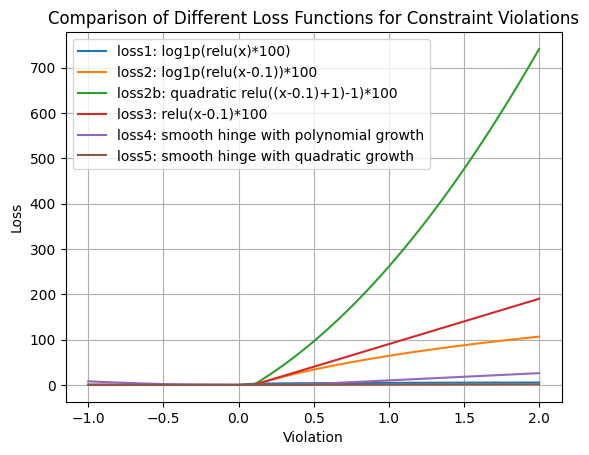

In [16]:
from matplotlib import pyplot as plt
import torch

C=0.1 # threshold
p=2 # power
S = 100 # scale


voilation = torch.linspace(-1, 2, steps=100)

def loss1(x):
    return torch.log1p(torch.relu(x) * S)

def loss2(x):
    return torch.log1p(torch.relu(x - C))  * S

def loss2b(x):
    y = ((x - C)+1.0)
    y = y**p - 1.0
    return (torch.relu(y))  * S

def loss3_hinge(x):
    return torch.relu(x - C) * S


def loss4_hinge(x):
    order=2
    scale=4
    margin=0.5
    # Match derivatives: b * C^b * v_t^(b-1) = a
    linear_slope = order * (scale ** order) * (margin ** (order-1))
    
    # Match values: (1/b) * (C * v_t)^b = linear_slope * v_t + intercept
    quadratic_value = (1/order) * ((scale * margin) ** order)
    linear_intercept = quadratic_value - linear_slope * margin
    
    small_violation = x < margin
    penalty = torch.where(
        small_violation,
        (1/order) * ((x * scale) ** order),  # Polynomial growth
        linear_slope * x + linear_intercept  # Linear growth
    )
    return penalty

def loss_5_hinge_quadratic(x):
    margin=0.5
    small_violation = x < margin
    penalty = torch.where(
        small_violation,
        0.5 * (x ** 2),  # Quadratic growth
        margin * (x - 0.5) + 0.5  # Linear growth
    )
    return penalty

plt.plot(voilation.numpy(), loss1(voilation).numpy(), label='loss1: log1p(relu(x)*100)')
plt.plot(voilation.numpy(), loss2(voilation).numpy(), label='loss2: log1p(relu(x-0.1))*100')
plt.plot(voilation.numpy(), loss2b(voilation).numpy(), label='loss2b: quadratic relu((x-0.1)+1)-1)*100')
plt.plot(voilation.numpy(), loss3_hinge(voilation).numpy(), label='loss3: relu(x-0.1)*100')
plt.plot(voilation.numpy(), loss4_hinge(voilation).numpy(), label='loss4: smooth hinge with polynomial growth')
plt.plot(voilation.numpy(), loss_5_hinge_quadratic(voilation).numpy(), label='loss5: smooth hinge with quadratic growth')   
plt.xlabel('Violation')
plt.ylabel('Loss')
plt.title('Comparison of Different Loss Functions for Constraint Violations')
plt.legend()
plt.grid(True)
plt.show()